In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('titanic_train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Pclass','Name','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis = 1 , inplace=True)
df.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [7]:
Sex = pd.get_dummies(df['Sex'],drop_first=True)
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [8]:
df = pd.concat([df,Sex],axis = 1)
df.head()

,Survived,Sex,male
0,0,male,1
1,1,female,0
2,1,female,0
3,1,female,0
4,0,male,1


In [9]:
df.drop(['Sex'],axis = 1 , inplace=True)
df.head()

,Survived,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


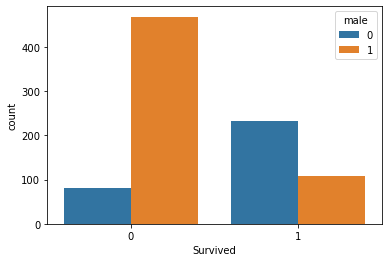

In [10]:
sns.countplot(x = 'Survived',hue = 'male',data = df)

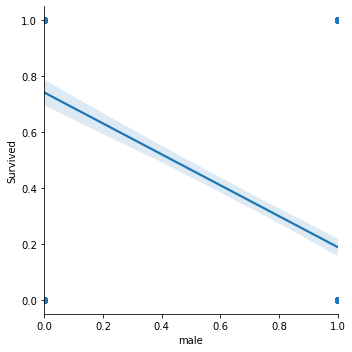

In [26]:
sns.lmplot(x = 'male',y = 'Survived',data =df)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['male']]
y = df['Survived']

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
lm.coef_

array([-0.53612148])

In [19]:
lm.intercept_

0.7233009708737864

In [20]:
lm.predict(X_test)

array([0.18717949, 0.18717949, 0.18717949, 0.72330097, 0.72330097,
       0.72330097, 0.72330097, 0.18717949, 0.72330097, 0.72330097,
       0.18717949, 0.18717949, 0.72330097, 0.18717949, 0.18717949,
       0.72330097, 0.18717949, 0.72330097, 0.18717949, 0.18717949,
       0.18717949, 0.18717949, 0.72330097, 0.18717949, 0.18717949,
       0.18717949, 0.18717949, 0.18717949, 0.18717949, 0.72330097,
       0.18717949, 0.72330097, 0.18717949, 0.72330097, 0.18717949,
       0.18717949, 0.18717949, 0.72330097, 0.72330097, 0.18717949,
       0.18717949, 0.18717949, 0.18717949, 0.18717949, 0.72330097,
       0.18717949, 0.18717949, 0.18717949, 0.18717949, 0.18717949,
       0.72330097, 0.72330097, 0.18717949, 0.18717949, 0.18717949,
       0.72330097, 0.18717949, 0.72330097, 0.72330097, 0.72330097,
       0.18717949, 0.72330097, 0.72330097, 0.18717949, 0.18717949,
       0.72330097, 0.18717949, 0.18717949, 0.18717949, 0.72330097,
       0.72330097, 0.72330097, 0.18717949, 0.72330097, 0.18717

In [21]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
715    0
525    0
381    1
140    0
173    0
Name: Survived, Length: 295, dtype: int64

In [22]:
#since linear regressions gives cont var not 0 or 1(discrete), we use logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log = LogisticRegression()

In [25]:
log.fit(X_train,y_train)

LogisticRegression()

In [27]:
log.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)